## Measurement of position

One of the things that might bother you when you first encounter quantum mechanics is the collapse of the spatial wave function $\psi(x)$ (it certainly bothered me). When a particle is an a state described by the wave function $\psi(x)$ and we measure the position, then $\psi(x)$ collapses to a $\delta$-function at the position $x'$ where the particle was detected. 

While you may be willing to accept this as just another magic thing about quantum mechanics, you still might ask yourself: how did the wave function at some point far from $x'$ know that the measurement done at $x'$ detected the particle at this point? For that to be possible the wave function must represent a highly  entangled state, such that the measurement at $x'$ can affect the rest of the wave function!

Now when you look at the typical wave functions we find as solutions to the Schrödinger equation in one dimension, they may not appear to represent highly entangled states at all. Consider, for example, free a particle on a ring of circumference $L$, where the ground state is just a constant (see e.g. Griffiths and Schroeter, 3ed, problem 2.46 and problem 7.41)

\begin{equation}
\psi(x)=\frac{1}{\sqrt{L}} \ .
\end{equation}

Is this really a wave function of a highly entangled state such that when we measure the position and detect the particle at $x'$ then all of the wave function immediately knows that it must collapse to $\delta(x')$? 


The answer is yes (!) and this exercise offers a chance to understand why this true. 

**What:** We will set up a spatial wave function and see how a measurement of the position leads to the collapsed wave function. In doing so we will explicitly see that even the constant wave function above in fact represent a highly entangled state, and it will (hopefully) be more clear how the wave function manages to collapse when a measurement of position is performed.


**Learning objective:** Obtain an understanding of the entangled nature of the wave function, and get insights into the collapse of the wave function.

**Entangled nature?** In case you are not yet familiar with the nature of entangled qubits - why not do the exercise on entangled qubist first? It is a great exercise in it's own right (I think) and it will prepare you well for understanding the entangled nature of the wave function in the exercise below.

If you already have som expirence with entanglement or if you just want to give it a go anyway, by all means just go ahead!

**How to set up a wave function with qubits:** 

We will think of each qubit as a position and intrepret a measurement of the qubit as a measurement of the position. If, for example, we measure the 5th qubit and find the value 1 then the intrepretation is that  we have measured the position of the particle and detected it at the 5th position. If the value obtained by the measurement is 0 the particle was not detected at this point.  

As this is not the standard way to ude of the qubits, we will start as simple as possible with just a single site and then add more sites as we go along. At the end we make the connection to the continuum wave function.  


To get going let's first import the relevant libraries:

In [1]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit import assemble

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

**A single site:** 

Let's start in the simplest possible manner, with just one position realized by a single qubit. We will set up the state of the particle and subsequantly measure the position. 


As there is only one possible position the only possible state of the system is $|1\rangle$. So the measurement better detect the particle at this site when we measure, othervise the particle has leaked out of the system. 

Let's check!

We first set up the measuremet:

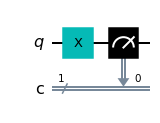

In [2]:
qc = QuantumCircuit(1,1) # This creates the quantum circut with 1 q-bit and 1 classical bit to read out the measurement
qc.x(0) # This puts the particle at the first q-bit
qc.measure(0,0) # This measures if it is there
qc.draw()

And now we perform the experiment (10 times):

In [3]:
simulator = Aer.get_backend('aer_simulator')

result = simulator.run(qc, shots=10, memory=True).result()
memory = result.get_memory(qc)
print(memory)

['1', '1', '1', '1', '1', '1', '1', '1', '1', '1']


**How to intrepret the result:** We have performed the measuremet 10 times and each time we have found that the particle was at the first position (given by the first qubit). This is hardly surprising, we only have one possible position and hence the particle has nowhere else to go!

**Two sites:** 

This far everything is just like in the classical case. To get the quantum nature of position measurements in play, let's now introduce a second position given by a second q-bit and consider the uniformly distributed state 

\begin{equation}
\psi=\frac{1}{\sqrt{2}}\big(|10\rangle+|01\rangle\big)
\end{equation}

As we have a uniform distribution we expect that a measurement of the position is equally likely to detect the particle at either or the two sites.


**Exercise 1:** Compute the probabilities of detection at the first site, $P=|\langle 01|\psi\rangle|^2$, and use this to show that our expectation is indeed true.

And now let's double-check experimentally. We first set up the quantum circut: 

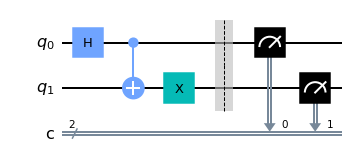

In [4]:
qc = QuantumCircuit(2,2) # Now the quantum circut has 2 q-bits (positions) and 2 classical bits to read out the measurement of the position
qc.h(0) # This put the first q-bit in the state 1/\sqrt{2}(|0>+|1>)
qc.cx(0,1) # This puts the second q-bit in |1> if the first is |1>
qc.x(1) # This flips the second q-bit and we have the desired state
qc.barrier() 
qc.measure(0,0) # We measure if the particle is at the first position (q-bit)
qc.measure(1,1) # We measure if the particle is at the second position (q-bit)
qc.draw()

and then do the measurement:

In [5]:
simulator = Aer.get_backend('aer_simulator')

result = simulator.run(qc, shots=10, memory=True).result()
memory = result.get_memory(qc)
print(memory)

['10', '01', '10', '01', '10', '01', '10', '10', '10', '10']


**How to read the result:** We have measured the position and '01' implies that the particle was detected at the first position while '10' that it was detected at the second position.

**Check:** Did the outcome match our expectation?

To get better statistics we can also run the experiment 1024 times:

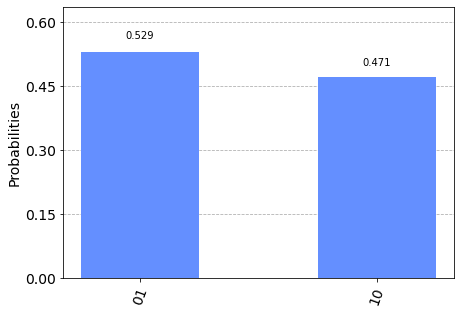

In [6]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram

sim = Aer.get_backend('qasm_simulator')  # this is the simulator we'll use
qobj = assemble(qc)  # this turns the circuit into an object our backend can run
result = sim.run(qobj).result()  # we run the experiment and get the result from that experiment
# from the results, we get a dictionary containing the number of times (counts)
# each result appeared
counts = result.get_counts()
# and display it on a histogram
plot_histogram(counts)

**Don't miss:** The uniform distribution of a particle over two sites

\begin{equation}
\psi=\frac{1}{\sqrt{2}}\big(|10\rangle+|01\rangle\big)
\end{equation}

we have just considered is an entangled state! (It will presumable look quite familiar to you if you have worked out the Exercises on entangled states.) 

So even for a system with just two positions the uniformly distributed state is an entangled state.

**A world with 3 sites:**

In order to study the collapse of the wave function let's now moove to a world with 3 sites and again start the system in the uniformly distributed state


\begin{equation}
\psi=\frac{1}{\sqrt{3}}\big(|100\rangle+|010\rangle+|001\rangle\big)
\end{equation}


**Exercise 2:** Check that the state is invatiant under permutations of any two of the sites. Hence a measurement of the position is equally likely to detect the particle at any of the 3 sites.

As always check your results explicitly with the measurement below. 

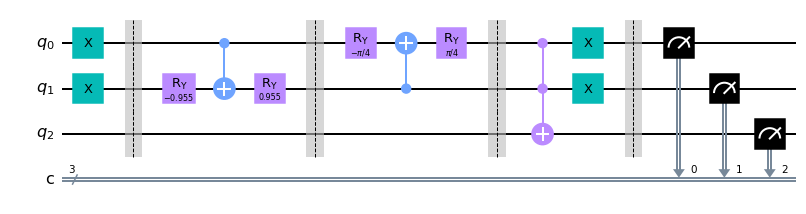

In [7]:
from math import pi
qc = QuantumCircuit(3,3)
qc.x(0)
qc.x(1)
qc.barrier()
sq2o3=np.sqrt(1/3)
theta=2*np.arccos(sq2o3)
qc.ry(-theta/2,1)
qc.cx(0,1)
qc.ry(theta/2,1)
qc.barrier()
qc.ry(-pi/4,0)
qc.cx(1,0)
qc.ry(pi/4,0)
qc.barrier()
qc.ccx(0,1,2)
qc.x(0)
qc.x(1)
qc.barrier()
qc.measure(0,0)
qc.measure(1,1)
qc.measure(2,2)
qc.draw()

**On the diagram:** The first part before the measurements puts the system in the uniform state $\psi$. Then at the end we perform the measurement of the position.

In [8]:
simulator = Aer.get_backend('aer_simulator')
result = simulator.run(qc, shots=10, memory=True).result()
memory = result.get_memory(qc)
print(memory)

['100', '100', '100', '001', '001', '100', '100', '100', '010', '100']


**How to read the result:** The position at which the '1' appears is where the measurement has detected the particle.

Now let's trun to the collapse!

**Exercise 3:** What is the state of the system after the measuremet has detected the particle? (Your answer will depend on where it is detected.)

Let's now repeat the measuremet of the position right after we did it the first time.

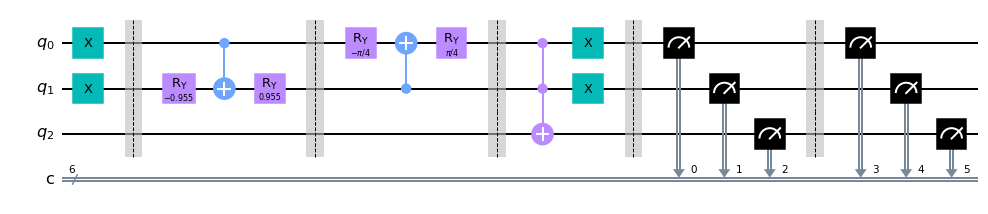

In [9]:
from math import pi
qc = QuantumCircuit(3,6)
qc.x(0)
qc.x(1)
qc.barrier()
sq2o3=np.sqrt(1/3)
theta=2*np.arccos(sq2o3)
qc.ry(-theta/2,1)
qc.cx(0,1)
qc.ry(theta/2,1)
qc.barrier()
qc.ry(-pi/4,0)
qc.cx(1,0)
qc.ry(pi/4,0)
qc.barrier()
qc.ccx(0,1,2)
qc.x(0)
qc.x(1)
qc.barrier()
qc.measure(0,0)
qc.measure(1,1)
qc.measure(2,2)
qc.barrier()
qc.measure(0,3)
qc.measure(1,4)
qc.measure(2,5)
qc.draw()

In [10]:
simulator = Aer.get_backend('aer_simulator')
result = simulator.run(qc, shots=10, memory=True).result()
memory = result.get_memory(qc)
print(memory)

['001001', '010010', '010010', '100100', '001001', '100100', '100100', '010010', '001001', '100100']


**How to read the result:** In order to read out the result of the two position measurements we now have 6 classical bits. The 3 right most outputs give the result of the first measurement and the 3 leftmost the result of the second measurement. For example, '010010' implies that we have detected the particle at the middle site both first and second time we measure.

**Exercise 4:** Explain the outcome of the experiment above?

**Don't miss:** The uniformly distributed state 

\begin{equation}
\psi=\frac{1}{\sqrt{3}}\big(|100\rangle+|010\rangle+|001\rangle\big)
\end{equation}

is a highly entangled state! The entanglement is essential for the collapse of the state when we measure the position.

**6 sites and any wave function:** 

Now let's take one more step towards the continuum wave function by doubling the number of sites. Also let's consider any distribution we like and not just the uniform distribution. Hence our state is  


\begin{equation}
\psi_6 = N\big(c_5|100000\rangle+c_4|010000\rangle+\ldots+c_0|000001\rangle\big)
\end{equation}

with the normalization

\begin{equation}
N = \frac{1}{\sqrt{c_0^2+c_1^2+\ldots+c_5^2}} \ .
\end{equation}

The coefficients $c_j$ can be thought of as the value of the wave function at the point given by the $j$'th q-bit. (For simplicity we consider them to be real here.)

**Exercise 5:** Pick the (real) values for the coefficients $c_0,\ldots,c_5$ you like in the code below and run it.

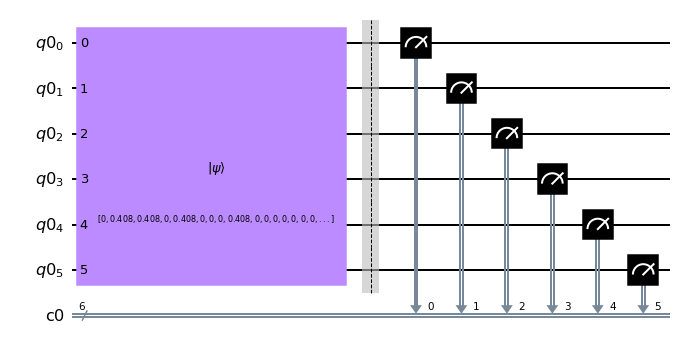

In [11]:
# Initializing the 6-qubit quantum state
import math
c0 = 1
c1 = 1
c2 = 1
c3 = 1
c4 = 1
c5 = 1
norm = 1 / math.sqrt(c0*c0+c1*c1+c2*c2+c3*c3+c4*c4+c5*c5)
desired_vector = [
    0,
    norm*c0,
    norm*c1,
    0,
    norm*c2,
    0,0,0, 
    norm*c3,
    0,0,0,0,0,0,0,
    norm*c4,
    0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
    norm*c5,
    0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

#    1 / math.sqrt(16) * complex(1, 0),
    
q = QuantumRegister(6)
    
c = ClassicalRegister(6)

qc = QuantumCircuit(q,c)

qc.initialize(desired_vector, [q[0],q[1],q[2],q[3],q[4],q[5]])
qc.barrier() # and now measure the position
qc.measure(0,0)
qc.measure(1,1)
qc.measure(2,2)
qc.measure(3,3)
qc.measure(4,4)
qc.measure(5,5)
qc.draw()

**How the read the diagram:** The big purple box sets up the state you have chosen, and then we measure the position of the particle.

**Exercise 6:** Predict the outcome for this measurement with the values you chose for the coefficients $c_0,\ldots,c_5$. 

Is your result consistent with the actual measurement below? (You may want to run it a few times to check.)

In [12]:
simulator = Aer.get_backend('aer_simulator')
result = simulator.run(qc, shots=10, memory=True).result()
memory = result.get_memory(qc)
print(memory)

['000100', '001000', '000001', '000100', '000010', '001000', '000001', '000100', '000100', '010000']


**Notice:** This time we have 6 measurements, one at each site. The '1' marks where the particle has been detected, the remaining 5 zeros show that the particle has not been detected there.

To check the collapse of the state you stared from let's now repeat the measurement of the position (again, pick any real values of the coefficients you like by chosing the values of $c_0,\ldots,c_5$!)

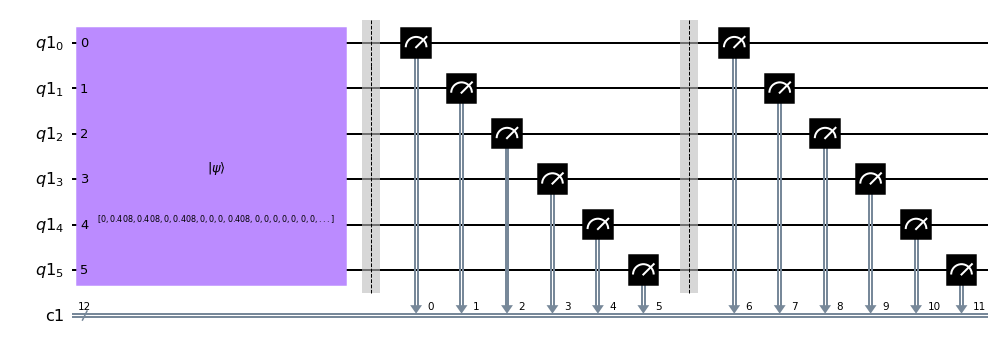

In [13]:
# Initializing the 6-qubit quantum state
import math
c0 = 1
c1 = 1
c2 = 1
c3 = 1
c4 = 1
c5 = 1
norm = 1 / math.sqrt(c0*c0+c1*c1+c2*c2+c3*c3+c4*c4+c5*c5)
desired_vector = [
    0,
    norm*c0,
    norm*c1,
    0,
    norm*c2,
    0,0,0, 
    norm*c3,
    0,0,0,0,0,0,0,
    norm*c4,
    0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
    norm*c5,
    0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

#    1 / math.sqrt(16) * complex(1, 0),
    
q = QuantumRegister(6)
    
c = ClassicalRegister(12)

qc = QuantumCircuit(q,c)

qc.initialize(desired_vector, [q[0],q[1],q[2],q[3],q[4],q[5]])
qc.barrier() # and now measure the position
qc.measure(0,0)
qc.measure(1,1)
qc.measure(2,2)
qc.measure(3,3)
qc.measure(4,4)
qc.measure(5,5)
qc.barrier() # and now measure the position again
qc.measure(0,6)
qc.measure(1,7)
qc.measure(2,8)
qc.measure(3,9)
qc.measure(4,10)
qc.measure(5,11)
qc.draw()

In [14]:
simulator = Aer.get_backend('aer_simulator')
result = simulator.run(qc, shots=10, memory=True).result()
memory = result.get_memory(qc)
print(memory)

['010000010000', '010000010000', '010000010000', '100000100000', '000010000010', '000010000010', '000010000010', '001000001000', '100000100000', '010000010000']


**How to read the result:** The rightmost 6 digits are the result of the first measurement of the position and the leftmost 6 are those of the measurement that follows.

**Exercise 7:** Explain the result we just obtained! (If you expirence a deja-vu from our examination of the 3 state world that is completely natural. We are doing almost the same only now we have 6 sites and an initial distribution you have chosen.)

**Conclusion this far:** We have just performed a measurement of the position in a world with 6 sites and have seen the collapse of the 'wave function'! Because the state is highly entangled the measurement of the position affects the state also at sites far from the position where it was detected.


Below we make the connection to the continuum wave function. It is mathematically somewhat involved, and it only involves analytic computations. Just skip it if you are not up for heavy math today.    

# Continuum 

In order to make the connection with the continuum wave functions we are used to from eg. Griffiths and Schröeters book let's consider a free particle of mass $m$ which mooves in one dimension on a segment of length $L$ and with periodic boundary conditions (a particle on a ring, see problem 2.46 and problem 7.41 in Griffiths and Schroeter book 3 edition) 

\begin{equation}
H = -\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2}
\end{equation}

The groundstate of this system is simply a constant

\begin{equation}
\psi(x) = \frac{1}{\sqrt{L}}
\end{equation}

**Exercise 8:** Show that the state $\psi$ is normalized and check that it satisfies the relevant boundary conditions. 

**Exercise 9:** Argue that $\psi$ is the groundstate, ie. that it is the stationary state of lowest energy (no calculations allowed!).

**Exercise 10:** Use the definition of the $\delta$-function to show that 

\begin{equation}
\psi(x) = \frac{1}{\sqrt{L}} \int_0^L dx' \ \delta(x-x')
\end{equation}

Now, this may at first seem like a rather bothersome way to write a constant function, but it is exactly what we need to understand the highly intangled nature of $\psi$: The integral over the $\delta$-function is the continuum analouge to the sum of the 3 states in the uniform distribution over the 3 site world

\begin{equation}
|\psi\rangle=\frac{1}{\sqrt{3}}\big(|100\rangle+|010\rangle+|001\rangle\big)
\end{equation}

And just like a measurement of position collapses $|\psi\rangle$ to $|100\rangle$ if the particle is detected on the 3rd site, the wave function 

\begin{equation}
\psi(x) = \frac{1}{\sqrt{L}} = \frac{1}{\sqrt{L}} \int_0^L dx' \ \delta(x-x')
\end{equation}

will collapse to 

\begin{equation}
\psi(x) = \delta(x-x')
\end{equation}

if a measurement of the position detects the particle at $x'$!

**.. a general and more formal derivation (for those so inclined):**

The above exercise (hopefully) have given you a better understanding of how the wave function collapses when we measure the position of a particle. At the end we made the connection between a constant continuum wave function and the 3 site world by analogy between the expressions involved. 

Here we will make this connection a bit more formal and generalize to any wave function on a finte segment with periodic boundary conditions. By all means skip it if you are happy using the analogy! 

To make the connection between the continuum and the discritized world a bit more formal let's split the segment $[0:L]$ into $N$ pices each of length $a=L/N$. Then we can rewrite the wavefunction as

\begin{eqnarray}
\psi(x) & = & \int_0^a dy \ \psi(y)\delta(x-y) + \int_a^{2a} dy \ \psi(y)\delta(x-y) + \ldots  + \int_{L-a}^{L} dy \ \psi(y)\delta(x-y)  \ .
\end{eqnarray}

For a particle in the state $\psi(x)$ the probability that a measurement of the position will detect the particle between $0$ and $a$ is given by 

\begin{equation}
\int_0^a |\psi(x)|^2 dx
\end{equation}

**Exercise 11:** Convince yourself that 

\begin{equation}
\int_0^a |\psi(x)|^2 dx = \int_0^a |\psi_0(x)|^2 dx 
\end{equation}

where 
$\psi_0(x)\equiv\int_0^a dy \ \psi(y)\delta(x-y)$.

Likevise the probability to measure the particle between $na$ and $(n+1)a$ is given by 

\begin{equation}
\int_{na}^{(n+1)a} |\psi(x)|^2 dx = \int_{na}^{(n+1)a} |\psi_n(x)|^2 dx 
\end{equation}

where 
$\psi_n(x)\equiv\int_{na}^{(n+1)a} dy \ \psi(y)\delta(x-y)$.


In the limit $N\to\infty$ the length, $a$, of each of the $N$ intervals become tiny and thus the wave function will not change drastically over one such interval. Hence we can replace $\psi_n(x)$ by a constant value, $\psi_n$, and thus make the identification 

\begin{eqnarray}
\psi_n & \to c_n
\end{eqnarray}

where $c_n$ is the coefficient of the n'th state $|0,\ldots,0,\underbrace{1,0,\ldots,0}_n\rangle$. Therefore with $N$ large we can think of the $c_n$ as the value of the wave function at position $n$.

(There certainly exist functions that have poles etc. that invalidates the statement above, but these functions do not make up valid wave functions in our Hilbert space.)

**Take home:** Even an innocuous looking wave function like the ground state of a particle on a ring (which is a constant) is in fact a highly entangled state! This is why it is possible that a measurement of the position leads to the collapse of the wave function.